In this notebook we experiment with implementing Latent Credible Analysis models. Let's build the most simpleLCA

In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import pandas as pd
import numpy as np

In [39]:
import tensorflow as tf
from tensorflow_probability import edward2 as ed
import tensorflow_probability as tfp

In [40]:
import sys
sys.path.insert(0, '../')

In [41]:
tf.__version__, tfp.__version__

('2.1.0', '0.9.0')

# Synthetic Dataset

In [42]:
claims = dict()
claims['source_id'] = [0, 0, 1, 1, 2]
claims['object_id'] = [0, 1, 1, 0, 1]
claims['value'] = [0, 1, 0, 1, 2]
claims = pd.DataFrame(data=claims)
claims

,source_id,object_id,value
0,0,0,0
1,0,1,1
2,1,1,0
3,1,0,1
4,2,1,2


# Truth Discovery

In [46]:
from spectrum.judge.lca_tf import LCA

In [47]:
lca = LCA()
lca.discover(claims)

({}, {})

For now just use directly BBVI

In [50]:
from spectrum.inference.bbvi import BBVI

In [53]:
bbvi = BBVI(p=lca.observed_model, q=lca.mean_field_model, p_vars=lca.model_vars, q_vars=lca.latent_vars, n_samples=2)

In [55]:
bbvi.train(epochs=1000, learning_rate=0.001)

iteration 0 -  loss 4.852030277252197
iteration 100 -  loss 4.844241619110107
iteration 200 -  loss 4.655076026916504
iteration 300 -  loss 4.701894760131836
iteration 400 -  loss 4.819034576416016
iteration 500 -  loss 4.867183685302734
iteration 600 -  loss 4.84746789932251
iteration 700 -  loss 4.692216873168945
iteration 800 -  loss 4.927833080291748
iteration 900 -  loss 4.6660614013671875


In [56]:
import matplotlib.pyplot as plt

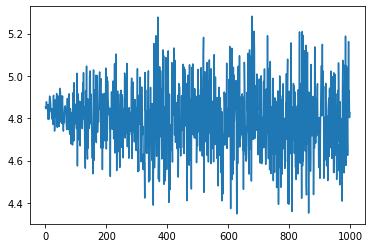

In [58]:
plt.plot(bbvi.train_loss)

In [70]:
tf.math.sigmoid?

Signature: tf.math.sigmoid(x, name=None)
Docstring:
Computes sigmoid of `x` element-wise.

Specifically, `y = 1 / (1 + exp(-x))`.

Args:
  x: A Tensor with type `float16`, `float32`, `float64`, `complex64`, or
    `complex128`.
  name: A name for the operation (optional).

Returns:
  A Tensor with the same type as `x`.

@compatibility(scipy)
Equivalent to scipy.special.expit
@end_compatibility
File:      ~/miniconda3/envs/bbvi/lib/python3.7/site-packages/tensorflow_core/python/ops/math_ops.py
Type:      function


In [59]:
lca.latent_vars

[<tf.Variable 'honest_probs_q:0' shape=(3,) dtype=float32, numpy=array([0.46089548, 0.48844063, 0.4919223 ], dtype=float32)>,
 <tf.Variable 'truth_prob_0_q:0' shape=(2,) dtype=float32, numpy=array([0.522385 , 0.4779005], dtype=float32)>,
 <tf.Variable 'truth_prob_1_q:0' shape=(3,) dtype=float32, numpy=array([0.38097712, 0.32764   , 0.2947515 ], dtype=float32)>]

In [60]:
lca.latent_vars[0]

<tf.Variable 'honest_probs_q:0' shape=(3,) dtype=float32, numpy=array([0.46089548, 0.48844063, 0.4919223 ], dtype=float32)>

In [64]:
import tensorflow_probability as tfp

In [66]:
lca.model_vars

[<tf.Variable 'honest_probs_p:0' shape=(3,) dtype=float32, numpy=array([0.4648654 , 0.43442994, 0.39777946], dtype=float32)>,
 <tf.Variable 'truth_prob_0_p:0' shape=(2,) dtype=float32, numpy=array([0.5197642 , 0.48051664], dtype=float32)>,
 <tf.Variable 'truth_prob_1_p:0' shape=(3,) dtype=float32, numpy=array([0.34060454, 0.357473  , 0.2995115 ], dtype=float32)>]

In [68]:
tf.Variable?

Init signature: tf.Variable(*args, **kwargs)
Docstring:     
See the [variable guide](https://tensorflow.org/guide/variable).

A variable maintains shared, persistent state manipulated by a program.

The `Variable()` constructor requires an initial value for the variable, which
can be a `Tensor` of any type and shape. This initial value defines the type
and shape of the variable. After construction, the type and shape of the
variable are fixed. The value can be changed using one of the assign methods.

>>> v = tf.Variable(1.)
>>> v.assign(2.)
<tf.Variable ... shape=() dtype=float32, numpy=2.0>
>>> v.assign_add(0.5)
<tf.Variable ... shape=() dtype=float32, numpy=2.5>

The `shape` argument to `Variable`'s constructor allows you to construct a
variable with a less defined shape than its `initial_value`:

>>> v = tf.Variable(1., shape=tf.TensorShape(None))
>>> v.assign([[1.]])
<tf.Variable ... shape=<unknown> dtype=float32, numpy=array([[1.]], ...)>

Just like any `Tensor`, variables creat

In [69]:
tf.math.softmax?

Signature: tf.math.softmax(logits, axis=None, name=None)
Docstring:
Computes softmax activations.

This function performs the equivalent of

    softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis)

Args:
  logits: A non-empty `Tensor`. Must be one of the following types: `half`,
    `float32`, `float64`.
  axis: The dimension softmax would be performed on. The default is -1 which
    indicates the last dimension.
  name: A name for the operation (optional).

Returns:
  A `Tensor`. Has the same type and shape as `logits`.

Raises:
  InvalidArgumentError: if `logits` is empty or `axis` is beyond the last
    dimension of `logits`.
File:      ~/miniconda3/envs/bbvi/lib/python3.7/site-packages/tensorflow_core/python/ops/nn_ops.py
Type:      function


# Draft

# Model $p(x,z)$

# Variational model $p(z)$

In [23]:
model(claims)

[<tf.Variable 'honest_probs:0' shape=(3,) dtype=float32, numpy=array([0.5, 0.5, 0.5], dtype=float32)>,
 <tf.Variable 'truth_prob_0:0' shape=(2,) dtype=float32, numpy=array([0.5, 0.5], dtype=float32)>,
 <tf.Variable 'truth_prob_1:0' shape=(3,) dtype=float32, numpy=array([0.33333334, 0.33333334, 0.33333334], dtype=float32)>]

# Testing